In [1]:
student_id = '20221555'
model_name = 'LCNet'

In [2]:
from competition_utils import *
from training_args import *

model_name = f'submission_{model_name}'
module_path = f"models.submission_{student_id}.{model_name}"
module = importlib.import_module(module_path)
globals()[model_name] = getattr(module, model_name)

Project_Name = 'Competition'
model_dir = 'models'
output_root = 'output'

SAVE_RESULT = True
SAVE_N = 1500
vis_root = f'vis/TEST_OUTPUTS_{datetime.now().strftime("%y%m%d_%H%M%S")}'

Dataset_root = 'Datasets'
Dataset_Name_list = [
                     'VOC',
                     'ETIS',
                     'CVPPP',
                     'CFD',
                     'CarDD',
]
number_of_classes_dict = {'VOC':21,
                          'ETIS':2,
                          'CVPPP':2,
                          'CFD':2,
                          'CarDD':2
                         }
epochs = 30
EARLY_STOP = 100
batch_size = 16
EXCLUDE_BACKGROUND = True
BINARY_SEG = None
THRESHOLD = 0.5
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
now = datetime.now()
Experiments_Time=now.strftime("%y%m%d_%H%M%S")
print('Experiment Start Time:',Experiments_Time)
eval_columns=['Experiment Time','Train Time', 'Dataset Name', 'Model Name', 'Val Loss', 'Test Loss', 'IoU', 'Dice',  'Precision', 'Recall', 'Total Params','Train-Predction Time']
df = pd.DataFrame(index=None, columns=eval_columns)
output_root = f'{output_root}/output_{Experiments_Time}'
os.makedirs(output_root, exist_ok = True)
seed = iteration = 1
for j, Dataset_Name in enumerate(Dataset_Name_list):
    print(f'Dataset: {Dataset_Name} ({j+1}/{len(Dataset_Name_list)})')
    control_random_seed(seed)
    Dataset_dir = Dataset_root+'/'+Dataset_Name
    Height, Width = (256, 256)
    in_channels = 3
    number_of_classes = number_of_classes_dict[Dataset_Name]
    BINARY_SEG = True if number_of_classes==2 else False
    exclude_background = EXCLUDE_BACKGROUND
    out_channels = 1 if BINARY_SEG else number_of_classes

    train_image_path_list = natsort.natsorted(glob.glob(f"{Dataset_dir}/train/Originals/*"))
    train_target_path_list = natsort.natsorted(glob.glob(f"{Dataset_dir}/train/Masks/*"))
    validation_image_path_list = natsort.natsorted(glob.glob(f"{Dataset_dir}/val/Originals/*"))
    validation_target_path_list = natsort.natsorted(glob.glob(f"{Dataset_dir}/val/Masks/*"))
    test_image_path_list = natsort.natsorted(glob.glob(f"{Dataset_dir}/test/Originals/*"))
    test_target_path_list = natsort.natsorted(glob.glob(f"{Dataset_dir}/test/Masks/*"))
    print(f'train/val/test: {len(train_image_path_list)}/{len(validation_image_path_list)}/{len(test_image_path_list)}')

    # train_dataset = ImagesDataset(train_image_path_list, train_target_path_list, augment=False)
    train_dataset = ImagesDataset(train_image_path_list, train_target_path_list)
    validation_dataset = ImagesDataset(validation_image_path_list, validation_target_path_list)
    test_dataset = ImagesDataset(test_image_path_list, test_target_path_list)
    train_loader = SegDataLoader(
    train_dataset, batch_size=batch_size,
    num_workers=4, pin_memory=True, shuffle=True, drop_last=True, fill_last_batch=False,
    )
    validation_loader = SegDataLoader(
        validation_dataset, batch_size=batch_size, 
        num_workers=4, pin_memory=True,
    )
    test_loader = SegDataLoader(
        test_dataset, batch_size=batch_size, 
        num_workers=4, pin_memory=True,
    )

    print(f'{model_name}', end=' ')
    print(f'Dataset: {Dataset_Name}) ({j+1}/{len(Dataset_Name_list)})', end=' ')
    output_dir = output_root + f'/{model_name}_{Dataset_Name}'
    control_random_seed(seed)
    model=globals()[model_name](in_channels, out_channels)
    model = model.to(device)
    optimizer = Make_Optimizer(model)
    lr_scheduler = Make_LR_Scheduler(optimizer)
    criterion = Make_Loss_Function(number_of_classes)
    if SAVE_RESULT==True:
        os.makedirs(vis_root+f"/{Dataset_Name}", exist_ok=True)
    df = Execute_Experiment(model_name, model, Dataset_Name, train_loader, validation_loader, test_loader, 
                            optimizer, lr_scheduler, criterion, number_of_classes, df, epochs, device, output_dir,
                           BINARY_SEG, exclude_background, out_channels, seed, THRESHOLD, EARLY_STOP, SAVE_RESULT, vis_root+f"/{Dataset_Name}", Experiments_Time
                           )
    df.to_csv(output_root+'/'+f'{Project_Name}_'+Experiments_Time+'.csv', index=False, header=True, encoding="cp949")

Experiment Start Time: 250612_033942
Dataset: VOC (1/5)
train/val/test: 1747/583/583
submission_LCNet Dataset: VOC) (1/5) Training Start Time: 250612_033943


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

1EP(250612_033957): T_Loss: 4.889316 V_Loss: 4.789118 IoU: 0.0043 Best Epoch: 1 Loss: 4.789118


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

2EP(250612_034009): T_Loss: 4.658342 V_Loss: 4.573359 IoU: 0.0035 Best Epoch: 2 Loss: 4.573359


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

3EP(250612_034023): T_Loss: 4.435140 V_Loss: 4.356593 IoU: 0.0029 Best Epoch: 3 Loss: 4.356593


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

4EP(250612_034035): T_Loss: 4.319101 V_Loss: 4.293542 IoU: 0.0025 Best Epoch: 4 Loss: 4.293542


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

5EP(250612_034049): T_Loss: 4.281816 V_Loss: 4.273496 IoU: 0.0028 Best Epoch: 5 Loss: 4.273496


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

6EP(250612_034103): T_Loss: 4.264116 V_Loss: 4.267325 IoU: 0.0031 Best Epoch: 6 Loss: 4.267325


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

7EP(250612_034114): T_Loss: 4.255172 V_Loss: 4.254539 IoU: 0.0019 Best Epoch: 7 Loss: 4.254539


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

8EP(250612_034128): T_Loss: 4.250140 V_Loss: 4.252055 IoU: 0.0012 Best Epoch: 8 Loss: 4.252055


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

9EP(250612_034140): T_Loss: 4.245154 V_Loss: 4.257212 IoU: 0.0023 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

10EP(250612_034154): T_Loss: 4.241842 V_Loss: 4.246014 IoU: 0.0020 Best Epoch: 10 Loss: 4.246014


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

11EP(250612_034208): T_Loss: 4.240136 V_Loss: 4.248033 IoU: 0.0028 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

12EP(250612_034219): T_Loss: 4.238905 V_Loss: 4.243764 IoU: 0.0021 Best Epoch: 12 Loss: 4.243764


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

13EP(250612_034234): T_Loss: 4.236596 V_Loss: 4.245553 IoU: 0.0024 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

14EP(250612_034245): T_Loss: 4.235829 V_Loss: 4.242622 IoU: 0.0022 Best Epoch: 14 Loss: 4.242622


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

15EP(250612_034259): T_Loss: 4.234944 V_Loss: 4.251337 IoU: 0.0032 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

16EP(250612_034311): T_Loss: 4.233230 V_Loss: 4.244360 IoU: 0.0032 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

17EP(250612_034325): T_Loss: 4.233320 V_Loss: 4.241557 IoU: 0.0027 Best Epoch: 17 Loss: 4.241557


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

18EP(250612_034339): T_Loss: 4.232076 V_Loss: 4.242501 IoU: 0.0033 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

19EP(250612_034350): T_Loss: 4.230848 V_Loss: 4.242304 IoU: 0.0020 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

20EP(250612_034404): T_Loss: 4.230030 V_Loss: 4.241626 IoU: 0.0034 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

21EP(250612_034416): T_Loss: 4.229934 V_Loss: 4.243940 IoU: 0.0036 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

22EP(250612_034430): T_Loss: 4.228178 V_Loss: 4.239230 IoU: 0.0032 Best Epoch: 22 Loss: 4.239230


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

23EP(250612_034442): T_Loss: 4.228942 V_Loss: 4.241827 IoU: 0.0036 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

24EP(250612_034455): T_Loss: 4.227420 V_Loss: 4.238264 IoU: 0.0030 Best Epoch: 24 Loss: 4.238264


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

25EP(250612_034509): T_Loss: 4.226316 V_Loss: 4.241024 IoU: 0.0039 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

26EP(250612_034521): T_Loss: 4.225787 V_Loss: 4.241207 IoU: 0.0036 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

27EP(250612_034535): T_Loss: 4.225470 V_Loss: 4.238274 IoU: 0.0030 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

28EP(250612_034547): T_Loss: 4.225682 V_Loss: 4.238452 IoU: 0.0031 


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

29EP(250612_034601): T_Loss: 4.224864 V_Loss: 4.238188 IoU: 0.0032 Best Epoch: 29 Loss: 4.238188


Training:   0%|          | 0/109 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/37 [00:00<?, ?batch/s]

30EP(250612_034612): T_Loss: 4.224346 V_Loss: 4.237759 IoU: 0.0029 Best Epoch: 30 Loss: 4.237759
Test Start Time: 250612_034612


Test:   0%|          | 0/37 [00:00<?, ?batch/s]

Best Epoch: 30
Test(250612_034745): Loss: 4.234479 IoU: 0.0106 Dice: 0.0143 Precision: 0.0204 Recall: 0.0137
End 250612_034745
Dataset: ETIS (2/5)
train/val/test: 118/39/39
submission_LCNet Dataset: ETIS) (2/5) Training Start Time: 250612_034745


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

1EP(250612_034745): T_Loss: 0.280413 V_Loss: 0.272583 IoU: 0.0387 Best Epoch: 1 Loss: 0.272583


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

2EP(250612_034746): T_Loss: 0.275763 V_Loss: 0.260032 IoU: 0.0561 Best Epoch: 2 Loss: 0.260032


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

3EP(250612_034747): T_Loss: 0.267313 V_Loss: 0.249956 IoU: 0.0604 Best Epoch: 3 Loss: 0.249956


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

4EP(250612_034748): T_Loss: 0.254829 V_Loss: 0.233780 IoU: 0.0514 Best Epoch: 4 Loss: 0.233780


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

5EP(250612_034749): T_Loss: 0.244900 V_Loss: 0.253427 IoU: 0.0775 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

6EP(250612_034750): T_Loss: 0.234857 V_Loss: 0.208550 IoU: 0.0192 Best Epoch: 6 Loss: 0.208550


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

7EP(250612_034751): T_Loss: 0.227602 V_Loss: 0.222348 IoU: 0.0496 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

8EP(250612_034752): T_Loss: 0.221732 V_Loss: 0.224733 IoU: 0.0328 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

9EP(250612_034752): T_Loss: 0.216705 V_Loss: 0.225802 IoU: 0.0539 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

10EP(250612_034753): T_Loss: 0.212681 V_Loss: 0.235909 IoU: 0.0818 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

11EP(250612_034754): T_Loss: 0.210380 V_Loss: 0.206304 IoU: 0.0273 Best Epoch: 11 Loss: 0.206304


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

12EP(250612_034755): T_Loss: 0.205839 V_Loss: 0.201574 IoU: 0.0260 Best Epoch: 12 Loss: 0.201574


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

13EP(250612_034756): T_Loss: 0.203477 V_Loss: 0.196505 IoU: 0.0226 Best Epoch: 13 Loss: 0.196505


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

14EP(250612_034757): T_Loss: 0.200426 V_Loss: 0.196673 IoU: 0.0317 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

15EP(250612_034758): T_Loss: 0.198870 V_Loss: 0.196135 IoU: 0.0219 Best Epoch: 15 Loss: 0.196135


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

16EP(250612_034759): T_Loss: 0.196640 V_Loss: 0.193002 IoU: 0.0164 Best Epoch: 16 Loss: 0.193002


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

17EP(250612_034759): T_Loss: 0.195137 V_Loss: 0.194300 IoU: 0.0417 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

18EP(250612_034800): T_Loss: 0.194649 V_Loss: 0.194121 IoU: 0.0287 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

19EP(250612_034801): T_Loss: 0.194843 V_Loss: 0.195848 IoU: 0.0595 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

20EP(250612_034802): T_Loss: 0.193168 V_Loss: 0.191203 IoU: 0.0419 Best Epoch: 20 Loss: 0.191203


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

21EP(250612_034803): T_Loss: 0.192304 V_Loss: 0.198904 IoU: 0.0490 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

22EP(250612_034804): T_Loss: 0.191817 V_Loss: 0.192059 IoU: 0.0437 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

23EP(250612_034805): T_Loss: 0.190419 V_Loss: 0.191092 IoU: 0.0501 Best Epoch: 23 Loss: 0.191092


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

24EP(250612_034806): T_Loss: 0.189741 V_Loss: 0.190339 IoU: 0.0606 Best Epoch: 24 Loss: 0.190339


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

25EP(250612_034806): T_Loss: 0.189347 V_Loss: 0.189742 IoU: 0.0665 Best Epoch: 25 Loss: 0.189742


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

26EP(250612_034807): T_Loss: 0.189219 V_Loss: 0.191030 IoU: 0.0869 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

27EP(250612_034808): T_Loss: 0.188971 V_Loss: 0.189383 IoU: 0.0664 Best Epoch: 27 Loss: 0.189383


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

28EP(250612_034809): T_Loss: 0.189450 V_Loss: 0.189990 IoU: 0.0696 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

29EP(250612_034810): T_Loss: 0.189515 V_Loss: 0.190745 IoU: 0.0794 


Training:   0%|          | 0/7 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/3 [00:00<?, ?batch/s]

30EP(250612_034811): T_Loss: 0.188485 V_Loss: 0.190201 IoU: 0.0752 
Test Start Time: 250612_034811


Test:   0%|          | 0/3 [00:00<?, ?batch/s]

Best Epoch: 27
Test(250612_034815): Loss: 0.187589 IoU: 0.0793 Dice: 0.1090 Precision: 0.2501 Recall: 0.1379
End 250612_034815
Dataset: CVPPP (3/5)
train/val/test: 486/162/162
submission_LCNet Dataset: CVPPP) (3/5) Training Start Time: 250612_034815


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

1EP(250612_034817): T_Loss: 0.224452 V_Loss: 0.252367 IoU: 0.2491 Best Epoch: 1 Loss: 0.252367


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

2EP(250612_034819): T_Loss: 0.198691 V_Loss: 0.196473 IoU: 0.5409 Best Epoch: 2 Loss: 0.196473


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

3EP(250612_034821): T_Loss: 0.182386 V_Loss: 0.172346 IoU: 0.7084 Best Epoch: 3 Loss: 0.172346


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

4EP(250612_034824): T_Loss: 0.171802 V_Loss: 0.167306 IoU: 0.7203 Best Epoch: 4 Loss: 0.167306


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

5EP(250612_034826): T_Loss: 0.167469 V_Loss: 0.163187 IoU: 0.6881 Best Epoch: 5 Loss: 0.163187


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

6EP(250612_034828): T_Loss: 0.164225 V_Loss: 0.161221 IoU: 0.7260 Best Epoch: 6 Loss: 0.161221


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

7EP(250612_034830): T_Loss: 0.162127 V_Loss: 0.159427 IoU: 0.7207 Best Epoch: 7 Loss: 0.159427


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

8EP(250612_034832): T_Loss: 0.160318 V_Loss: 0.158182 IoU: 0.7073 Best Epoch: 8 Loss: 0.158182


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

9EP(250612_034834): T_Loss: 0.159456 V_Loss: 0.158005 IoU: 0.7296 Best Epoch: 9 Loss: 0.158005


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

10EP(250612_034837): T_Loss: 0.158631 V_Loss: 0.156274 IoU: 0.7094 Best Epoch: 10 Loss: 0.156274


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

11EP(250612_034839): T_Loss: 0.157597 V_Loss: 0.155641 IoU: 0.7120 Best Epoch: 11 Loss: 0.155641


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

12EP(250612_034841): T_Loss: 0.157353 V_Loss: 0.155120 IoU: 0.7005 Best Epoch: 12 Loss: 0.155120


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

13EP(250612_034843): T_Loss: 0.156746 V_Loss: 0.154768 IoU: 0.6818 Best Epoch: 13 Loss: 0.154768


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

14EP(250612_034843): T_Loss: 0.155991 V_Loss: 0.154362 IoU: 0.7163 Best Epoch: 14 Loss: 0.154362


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

15EP(250612_034846): T_Loss: 0.155759 V_Loss: 0.153962 IoU: 0.6848 Best Epoch: 15 Loss: 0.153962


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

16EP(250612_034848): T_Loss: 0.155828 V_Loss: 0.153606 IoU: 0.7137 Best Epoch: 16 Loss: 0.153606


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

17EP(250612_034850): T_Loss: 0.154718 V_Loss: 0.153553 IoU: 0.6863 Best Epoch: 17 Loss: 0.153553


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

18EP(250612_034852): T_Loss: 0.155041 V_Loss: 0.153106 IoU: 0.6688 Best Epoch: 18 Loss: 0.153106


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

19EP(250612_034854): T_Loss: 0.154554 V_Loss: 0.153126 IoU: 0.6614 


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

20EP(250612_034856): T_Loss: 0.154170 V_Loss: 0.152881 IoU: 0.7030 Best Epoch: 20 Loss: 0.152881


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

21EP(250612_034859): T_Loss: 0.154311 V_Loss: 0.152706 IoU: 0.7259 Best Epoch: 21 Loss: 0.152706


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

22EP(250612_034901): T_Loss: 0.154279 V_Loss: 0.152555 IoU: 0.7135 Best Epoch: 22 Loss: 0.152555


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

23EP(250612_034903): T_Loss: 0.153940 V_Loss: 0.152759 IoU: 0.7003 


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

24EP(250612_034905): T_Loss: 0.154575 V_Loss: 0.152362 IoU: 0.7156 Best Epoch: 24 Loss: 0.152362


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

25EP(250612_034908): T_Loss: 0.154002 V_Loss: 0.152241 IoU: 0.6751 Best Epoch: 25 Loss: 0.152241


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

26EP(250612_034910): T_Loss: 0.153893 V_Loss: 0.152231 IoU: 0.6911 Best Epoch: 26 Loss: 0.152231


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

27EP(250612_034912): T_Loss: 0.153402 V_Loss: 0.152238 IoU: 0.6988 


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

28EP(250612_034914): T_Loss: 0.153734 V_Loss: 0.151987 IoU: 0.6913 Best Epoch: 28 Loss: 0.151987


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

29EP(250612_034915): T_Loss: 0.153518 V_Loss: 0.152046 IoU: 0.6823 


Training:   0%|          | 0/30 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/11 [00:00<?, ?batch/s]

30EP(250612_034917): T_Loss: 0.153519 V_Loss: 0.152035 IoU: 0.6830 
Test Start Time: 250612_034917


Test:   0%|          | 0/11 [00:00<?, ?batch/s]

Best Epoch: 28
Test(250612_034943): Loss: 0.153102 IoU: 0.6583 Dice: 0.7555 Precision: 0.9299 Recall: 0.6658
End 250612_034943
Dataset: CFD (4/5)
train/val/test: 70/24/24
submission_LCNet Dataset: CFD) (4/5) Training Start Time: 250612_034943


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

1EP(250612_034944): T_Loss: 0.286062 V_Loss: 0.281095 IoU: 0.0103 Best Epoch: 1 Loss: 0.281095


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

2EP(250612_034945): T_Loss: 0.284588 V_Loss: 0.275328 IoU: 0.0080 Best Epoch: 2 Loss: 0.275328


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

3EP(250612_034944): T_Loss: 0.280266 V_Loss: 0.270675 IoU: 0.0099 Best Epoch: 3 Loss: 0.270675


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

4EP(250612_034944): T_Loss: 0.272784 V_Loss: 0.271794 IoU: 0.0135 


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

5EP(250612_034945): T_Loss: 0.264034 V_Loss: 0.268435 IoU: 0.0155 Best Epoch: 5 Loss: 0.268435


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

6EP(250612_034946): T_Loss: 0.256330 V_Loss: 0.263871 IoU: 0.0145 Best Epoch: 6 Loss: 0.263871


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

7EP(250612_034947): T_Loss: 0.249849 V_Loss: 0.260016 IoU: 0.0135 Best Epoch: 7 Loss: 0.260016


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

8EP(250612_034947): T_Loss: 0.244613 V_Loss: 0.256005 IoU: 0.0128 Best Epoch: 8 Loss: 0.256005


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

9EP(250612_034948): T_Loss: 0.240130 V_Loss: 0.247166 IoU: 0.0105 Best Epoch: 9 Loss: 0.247166


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

10EP(250612_034949): T_Loss: 0.236469 V_Loss: 0.240320 IoU: 0.0065 Best Epoch: 10 Loss: 0.240320


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

11EP(250612_034950): T_Loss: 0.233151 V_Loss: 0.236333 IoU: 0.0054 Best Epoch: 11 Loss: 0.236333


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

12EP(250612_034950): T_Loss: 0.230319 V_Loss: 0.232529 IoU: 0.0049 Best Epoch: 12 Loss: 0.232529


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

13EP(250612_034951): T_Loss: 0.227961 V_Loss: 0.229136 IoU: 0.0041 Best Epoch: 13 Loss: 0.229136


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

14EP(250612_034952): T_Loss: 0.225738 V_Loss: 0.226350 IoU: 0.0034 Best Epoch: 14 Loss: 0.226350


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

15EP(250612_034953): T_Loss: 0.223873 V_Loss: 0.224218 IoU: 0.0031 Best Epoch: 15 Loss: 0.224218


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

16EP(250612_034953): T_Loss: 0.222299 V_Loss: 0.222322 IoU: 0.0031 Best Epoch: 16 Loss: 0.222322


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

17EP(250612_034954): T_Loss: 0.220926 V_Loss: 0.220595 IoU: 0.0027 Best Epoch: 17 Loss: 0.220595


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

18EP(250612_034955): T_Loss: 0.219735 V_Loss: 0.219131 IoU: 0.0025 Best Epoch: 18 Loss: 0.219131


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

19EP(250612_034956): T_Loss: 0.218639 V_Loss: 0.217987 IoU: 0.0024 Best Epoch: 19 Loss: 0.217987


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

20EP(250612_034956): T_Loss: 0.217657 V_Loss: 0.217152 IoU: 0.0022 Best Epoch: 20 Loss: 0.217152


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

21EP(250612_034957): T_Loss: 0.216745 V_Loss: 0.216455 IoU: 0.0021 Best Epoch: 21 Loss: 0.216455


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

22EP(250612_034958): T_Loss: 0.216003 V_Loss: 0.215809 IoU: 0.0021 Best Epoch: 22 Loss: 0.215809


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

23EP(250612_034959): T_Loss: 0.215403 V_Loss: 0.215221 IoU: 0.0021 Best Epoch: 23 Loss: 0.215221


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

24EP(250612_034959): T_Loss: 0.214776 V_Loss: 0.214739 IoU: 0.0021 Best Epoch: 24 Loss: 0.214739


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

25EP(250612_035000): T_Loss: 0.214329 V_Loss: 0.214336 IoU: 0.0020 Best Epoch: 25 Loss: 0.214336


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

26EP(250612_035001): T_Loss: 0.213956 V_Loss: 0.213953 IoU: 0.0020 Best Epoch: 26 Loss: 0.213953


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

27EP(250612_035002): T_Loss: 0.213470 V_Loss: 0.213596 IoU: 0.0019 Best Epoch: 27 Loss: 0.213596


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

28EP(250612_035002): T_Loss: 0.213246 V_Loss: 0.213302 IoU: 0.0019 Best Epoch: 28 Loss: 0.213302


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

29EP(250612_035003): T_Loss: 0.212971 V_Loss: 0.213116 IoU: 0.0019 Best Epoch: 29 Loss: 0.213116


Training:   0%|          | 0/4 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/2 [00:00<?, ?batch/s]

30EP(250612_035004): T_Loss: 0.212839 V_Loss: 0.213044 IoU: 0.0019 Best Epoch: 30 Loss: 0.213044
Test Start Time: 250612_035004


Test:   0%|          | 0/2 [00:00<?, ?batch/s]

Best Epoch: 30
Test(250612_035007): Loss: 0.212456 IoU: 0.0006 Dice: 0.0011 Precision: 0.0007 Recall: 0.0029
End 250612_035007
Dataset: CarDD (5/5)
train/val/test: 310/104/104
submission_LCNet Dataset: CarDD) (5/5) Training Start Time: 250612_035007


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

1EP(250612_035009): T_Loss: 0.256484 V_Loss: 0.269072 IoU: 0.1620 Best Epoch: 1 Loss: 0.269072


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

2EP(250612_035011): T_Loss: 0.237470 V_Loss: 0.244806 IoU: 0.2186 Best Epoch: 2 Loss: 0.244806


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

3EP(250612_035012): T_Loss: 0.219819 V_Loss: 0.215615 IoU: 0.2355 Best Epoch: 3 Loss: 0.215615


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

4EP(250612_035014): T_Loss: 0.205409 V_Loss: 0.192759 IoU: 0.1965 Best Epoch: 4 Loss: 0.192759


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

5EP(250612_035015): T_Loss: 0.195962 V_Loss: 0.192604 IoU: 0.2033 Best Epoch: 5 Loss: 0.192604


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

6EP(250612_035015): T_Loss: 0.189622 V_Loss: 0.185850 IoU: 0.1947 Best Epoch: 6 Loss: 0.185850


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

7EP(250612_035017): T_Loss: 0.185020 V_Loss: 0.179980 IoU: 0.1614 Best Epoch: 7 Loss: 0.179980


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

8EP(250612_035018): T_Loss: 0.181529 V_Loss: 0.183469 IoU: 0.2126 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

9EP(250612_035020): T_Loss: 0.179159 V_Loss: 0.180203 IoU: 0.2178 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

10EP(250612_035021): T_Loss: 0.177063 V_Loss: 0.176184 IoU: 0.1910 Best Epoch: 10 Loss: 0.176184


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

11EP(250612_035023): T_Loss: 0.175663 V_Loss: 0.177188 IoU: 0.2016 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

12EP(250612_035025): T_Loss: 0.174351 V_Loss: 0.176242 IoU: 0.1987 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

13EP(250612_035026): T_Loss: 0.173055 V_Loss: 0.172888 IoU: 0.1888 Best Epoch: 13 Loss: 0.172888


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

14EP(250612_035028): T_Loss: 0.172021 V_Loss: 0.170665 IoU: 0.1441 Best Epoch: 14 Loss: 0.170665


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

15EP(250612_035029): T_Loss: 0.171265 V_Loss: 0.170299 IoU: 0.1263 Best Epoch: 15 Loss: 0.170299


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

16EP(250612_035031): T_Loss: 0.170403 V_Loss: 0.170188 IoU: 0.1664 Best Epoch: 16 Loss: 0.170188


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

17EP(250612_035033): T_Loss: 0.169785 V_Loss: 0.170765 IoU: 0.1675 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

18EP(250612_035034): T_Loss: 0.169031 V_Loss: 0.169661 IoU: 0.1777 Best Epoch: 18 Loss: 0.169661


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

19EP(250612_035036): T_Loss: 0.168738 V_Loss: 0.169207 IoU: 0.1322 Best Epoch: 19 Loss: 0.169207


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

20EP(250612_035037): T_Loss: 0.168410 V_Loss: 0.168315 IoU: 0.1517 Best Epoch: 20 Loss: 0.168315


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

21EP(250612_035039): T_Loss: 0.167878 V_Loss: 0.168752 IoU: 0.1646 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

22EP(250612_035041): T_Loss: 0.167436 V_Loss: 0.168571 IoU: 0.1664 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

23EP(250612_035042): T_Loss: 0.167286 V_Loss: 0.167511 IoU: 0.1395 Best Epoch: 23 Loss: 0.167511


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

24EP(250612_035044): T_Loss: 0.166831 V_Loss: 0.169173 IoU: 0.1896 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

25EP(250612_035045): T_Loss: 0.166747 V_Loss: 0.168895 IoU: 0.1930 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

26EP(250612_035045): T_Loss: 0.166792 V_Loss: 0.167884 IoU: 0.1634 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

27EP(250612_035046): T_Loss: 0.166340 V_Loss: 0.168323 IoU: 0.1798 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

28EP(250612_035048): T_Loss: 0.166384 V_Loss: 0.168228 IoU: 0.1886 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

29EP(250612_035050): T_Loss: 0.166248 V_Loss: 0.167864 IoU: 0.1793 


Training:   0%|          | 0/19 [00:00<?, ?batch/s]

Valiation:   0%|          | 0/7 [00:00<?, ?batch/s]

30EP(250612_035051): T_Loss: 0.166116 V_Loss: 0.167810 IoU: 0.1762 
Test Start Time: 250612_035051


Test:   0%|          | 0/7 [00:00<?, ?batch/s]

Best Epoch: 23
Test(250612_035108): Loss: 0.168741 IoU: 0.1494 Dice: 0.2256 Precision: 0.5492 Recall: 0.1747
End 250612_035108


In [4]:
# 우회를 위한 prefix 제거
model_name = model_name.replace('submission_', '')

In [5]:
# 결과 분석 및 데이터 로드
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CSV 파일 읽기
results_df = pd.read_csv(output_root+'/'+f'{Project_Name}_'+Experiments_Time+'.csv', encoding='cp949')

print("\n=== 실험 결과 요약 ===")
print(f"모델: {results_df['Model Name'].unique()}")
print(f"\n=== 모델 파라미터 정보 ===")
if 'Total Params' in results_df.columns:
    total_params = results_df['Total Params'].iloc[1]  # 모든 실험에서 같은 모델 사용
    total_params = int(total_params.replace(',',''))
    print("총 파라미터 수: {:,}".format(total_params))

# 2. 각 데이터셋별 IoU 결과
print(f"\n=== 데이터셋별 IoU 결과 ===")
dataset_results = results_df[['Dataset Name', 'IoU', 'Dice', 'Precision', 'Recall']].copy()
dataset_results = dataset_results.round(4)
print(dataset_results.to_string(index=False))

# 3. Mean IoU 계산
mean_iou = results_df['IoU'].mean()
print(f"\n=== 전체 성능 요약 ===")
print(f"Mean IoU: {mean_iou:.4f}")
print(f"Mean Dice: {results_df['Dice'].mean():.4f}")
print(f"Mean Precision: {results_df['Precision'].mean():.4f}")
print(f"Mean Recall: {results_df['Recall'].mean():.4f}")

# 상세 결과 테이블
print(f"\n=== 상세 실험 결과 ===")
display_df = results_df[['Dataset Name', 'Model Name', 'IoU', 'Dice', 'Precision', 'Recall', 'Total Params']].copy()
display_df = display_df.round(4)
print(display_df.to_string(index=False))



=== 실험 결과 요약 ===
모델: ['submission_LCNet']

=== 모델 파라미터 정보 ===
총 파라미터 수: 508,258

=== 데이터셋별 IoU 결과 ===
Dataset Name    IoU   Dice  Precision  Recall
         VOC 0.0106 0.0143     0.0204  0.0137
        ETIS 0.0793 0.1090     0.2501  0.1379
       CVPPP 0.6583 0.7555     0.9299  0.6658
         CFD 0.0006 0.0011     0.0007  0.0029
       CarDD 0.1494 0.2256     0.5492  0.1747

=== 전체 성능 요약 ===
Mean IoU: 0.1796
Mean Dice: 0.2211
Mean Precision: 0.3501
Mean Recall: 0.1990

=== 상세 실험 결과 ===
Dataset Name       Model Name    IoU   Dice  Precision  Recall Total Params
         VOC submission_LCNet 0.0106 0.0143     0.0204  0.0137      509,578
        ETIS submission_LCNet 0.0793 0.1090     0.2501  0.1379      508,258
       CVPPP submission_LCNet 0.6583 0.7555     0.9299  0.6658      508,258
         CFD submission_LCNet 0.0006 0.0011     0.0007  0.0029      508,258
       CarDD submission_LCNet 0.1494 0.2256     0.5492  0.1747      508,258


In [6]:
# Global CSV에 결과 저장 (파라미터 사이즈와 Mean IoU만)
global_csv_path = 'results.csv'
global_result = {
    'Model_Name': [model_name],
    'Experiment_Time': [Experiments_Time],
    'Total_Params': [total_params],
    'Mean_IoU': [mean_iou]
}
global_df = pd.DataFrame(global_result)

# 기존 global CSV가 있으면 읽어서 추가, 없으면 새로 생성
if os.path.exists(global_csv_path):
    existing_global_df = pd.read_csv(global_csv_path)
    global_df = pd.concat([existing_global_df, global_df], ignore_index=True)

global_df.to_csv(global_csv_path, index=False)
print(f"\n=== Global 결과 저장 완료 ===")
print(f"저장 경로: {global_csv_path}")
print(f"누적 실험 수: {len(global_df)}")

# Global CSV 내용 확인
print(f"\n=== Global CSV 현재 내용 ===")
print(global_df.to_string(index=False))



=== Global 결과 저장 완료 ===
저장 경로: results.csv
누적 실험 수: 5

=== Global CSV 현재 내용 ===
Model_Name Experiment_Time  Total_Params  Mean_IoU
  Baseline   250612_020604       7763041  0.387735
  Baseline   250612_022650       7763041  0.385343
     LCNet   250612_031035        508258  0.258133
     LCNet   250612_032355        508258  0.274923
     LCNet   250612_033942        508258  0.179640


In [7]:
# ==================== Core Metrics CSV 저장 ====================
# Core metrics를 별도 CSV로 저장
core_metrics_path = f'{output_root}/core_metrics_{Experiments_Time}.csv'

core_metrics_data = pd.DataFrame({
    'Student ID': [student_id],
    'Model Name': [model_name],
    'Experiment Time': [Experiments_Time],
    'Mean IoU': [round(mean_iou, 4)],
    'Total Params': [total_params]
})

core_metrics_data.to_csv(core_metrics_path, index=False, encoding='utf-8')
print(f"\n=== Core Metrics CSV 저장 완료 ===")
print(f"저장 경로: {core_metrics_path}")
print(f"\nCore Metrics 내용:")
print(core_metrics_data.to_string(index=False))

# ==================== Detail Metrics CSV 저장 ====================
# 상세 결과 테이블 출력
# Core metrics를 별도 CSV로 저장
detail_metrics_path = f'{output_root}/detail_metrics_{Experiments_Time}.csv'

display_df = results_df[['Dataset Name', 'Model Name', 'IoU', 'Dice', 'Precision', 'Recall', 'Total Params']].copy()
display_df = display_df.round(4)
display_df['Total Params'] = display_df['Total Params'].str.replace(',','').astype(int)

display_df.to_csv(detail_metrics_path, index=False)
print(f"\n=== Detail Metrics CSV 저장 완료 ===")
print(f"저장 경로: {detail_metrics_path}")
print(f"\nDetail Metrics 내용:")
print(display_df.to_string(index=False))


=== Core Metrics CSV 저장 완료 ===
저장 경로: output/output_250612_033942/core_metrics_250612_033942.csv

Core Metrics 내용:
Student ID Model Name Experiment Time  Mean IoU  Total Params
  20221555      LCNet   250612_033942    0.1796        508258

=== Detail Metrics CSV 저장 완료 ===
저장 경로: output/output_250612_033942/detail_metrics_250612_033942.csv

Detail Metrics 내용:
Dataset Name       Model Name    IoU   Dice  Precision  Recall  Total Params
         VOC submission_LCNet 0.0106 0.0143     0.0204  0.0137        509578
        ETIS submission_LCNet 0.0793 0.1090     0.2501  0.1379        508258
       CVPPP submission_LCNet 0.6583 0.7555     0.9299  0.6658        508258
         CFD submission_LCNet 0.0006 0.0011     0.0007  0.0029        508258
       CarDD submission_LCNet 0.1494 0.2256     0.5492  0.1747        508258


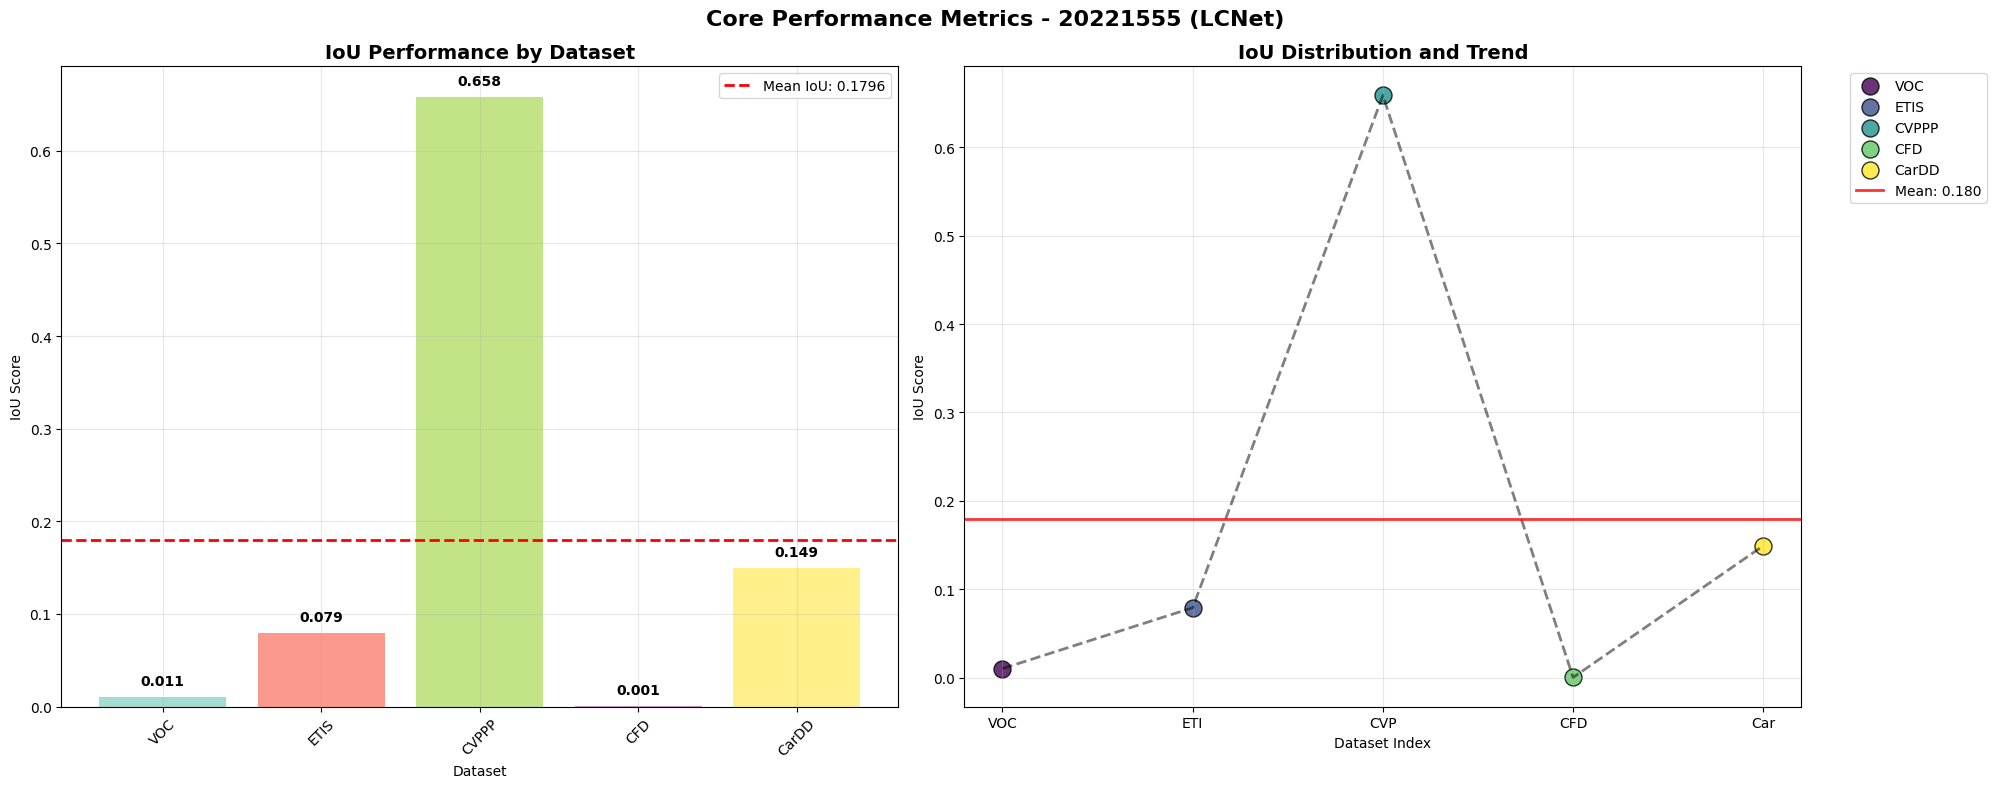

In [8]:
# ==================== 첫 번째 장: 핵심 지표 시각화 ====================
plt.figure(figsize=(20, 8))
plt.suptitle(f'Core Performance Metrics - {student_id} ({model_name})', fontsize=16, fontweight='bold')

# 1-1. 각 데이터셋별 IoU (바 차트)
plt.subplot(1, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, len(results_df)))
bars = plt.bar(results_df['Dataset Name'], results_df['IoU'], color=colors, alpha=0.8)
plt.axhline(y=mean_iou, color='red', linestyle='--', linewidth=2, label=f'Mean IoU: {mean_iou:.4f}')
plt.title('IoU Performance by Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Dataset')
plt.ylabel('IoU Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 각 바 위에 수치 표시
for bar, value in zip(bars, results_df['IoU']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 1-2. IoU 분포 (레이더 차트 스타일)
plt.subplot(1, 2, 2)
datasets = results_df['Dataset Name'].tolist()
iou_scores = results_df['IoU'].tolist()

# 색상 맵 생성
colors = plt.cm.viridis(np.linspace(0, 1, len(datasets)))

for i, (dataset, iou, color) in enumerate(zip(datasets, iou_scores, colors)):
    plt.scatter(i, iou, s=150, c=[color], alpha=0.8, label=dataset, edgecolors='black', linewidth=1)

plt.plot(range(len(datasets)), iou_scores, 'k--', alpha=0.5, linewidth=2)
plt.axhline(y=mean_iou, color='red', linestyle='-', alpha=0.8, linewidth=2,
            label=f'Mean: {mean_iou:.3f}')
plt.title('IoU Distribution and Trend', fontsize=14, fontweight='bold')
plt.xlabel('Dataset Index')
plt.ylabel('IoU Score')
plt.xticks(range(len(datasets)), [d[:3] for d in datasets])  # 줄여서 표시
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_root+'/'+f'core_performance_{Experiments_Time}.png')
plt.show()

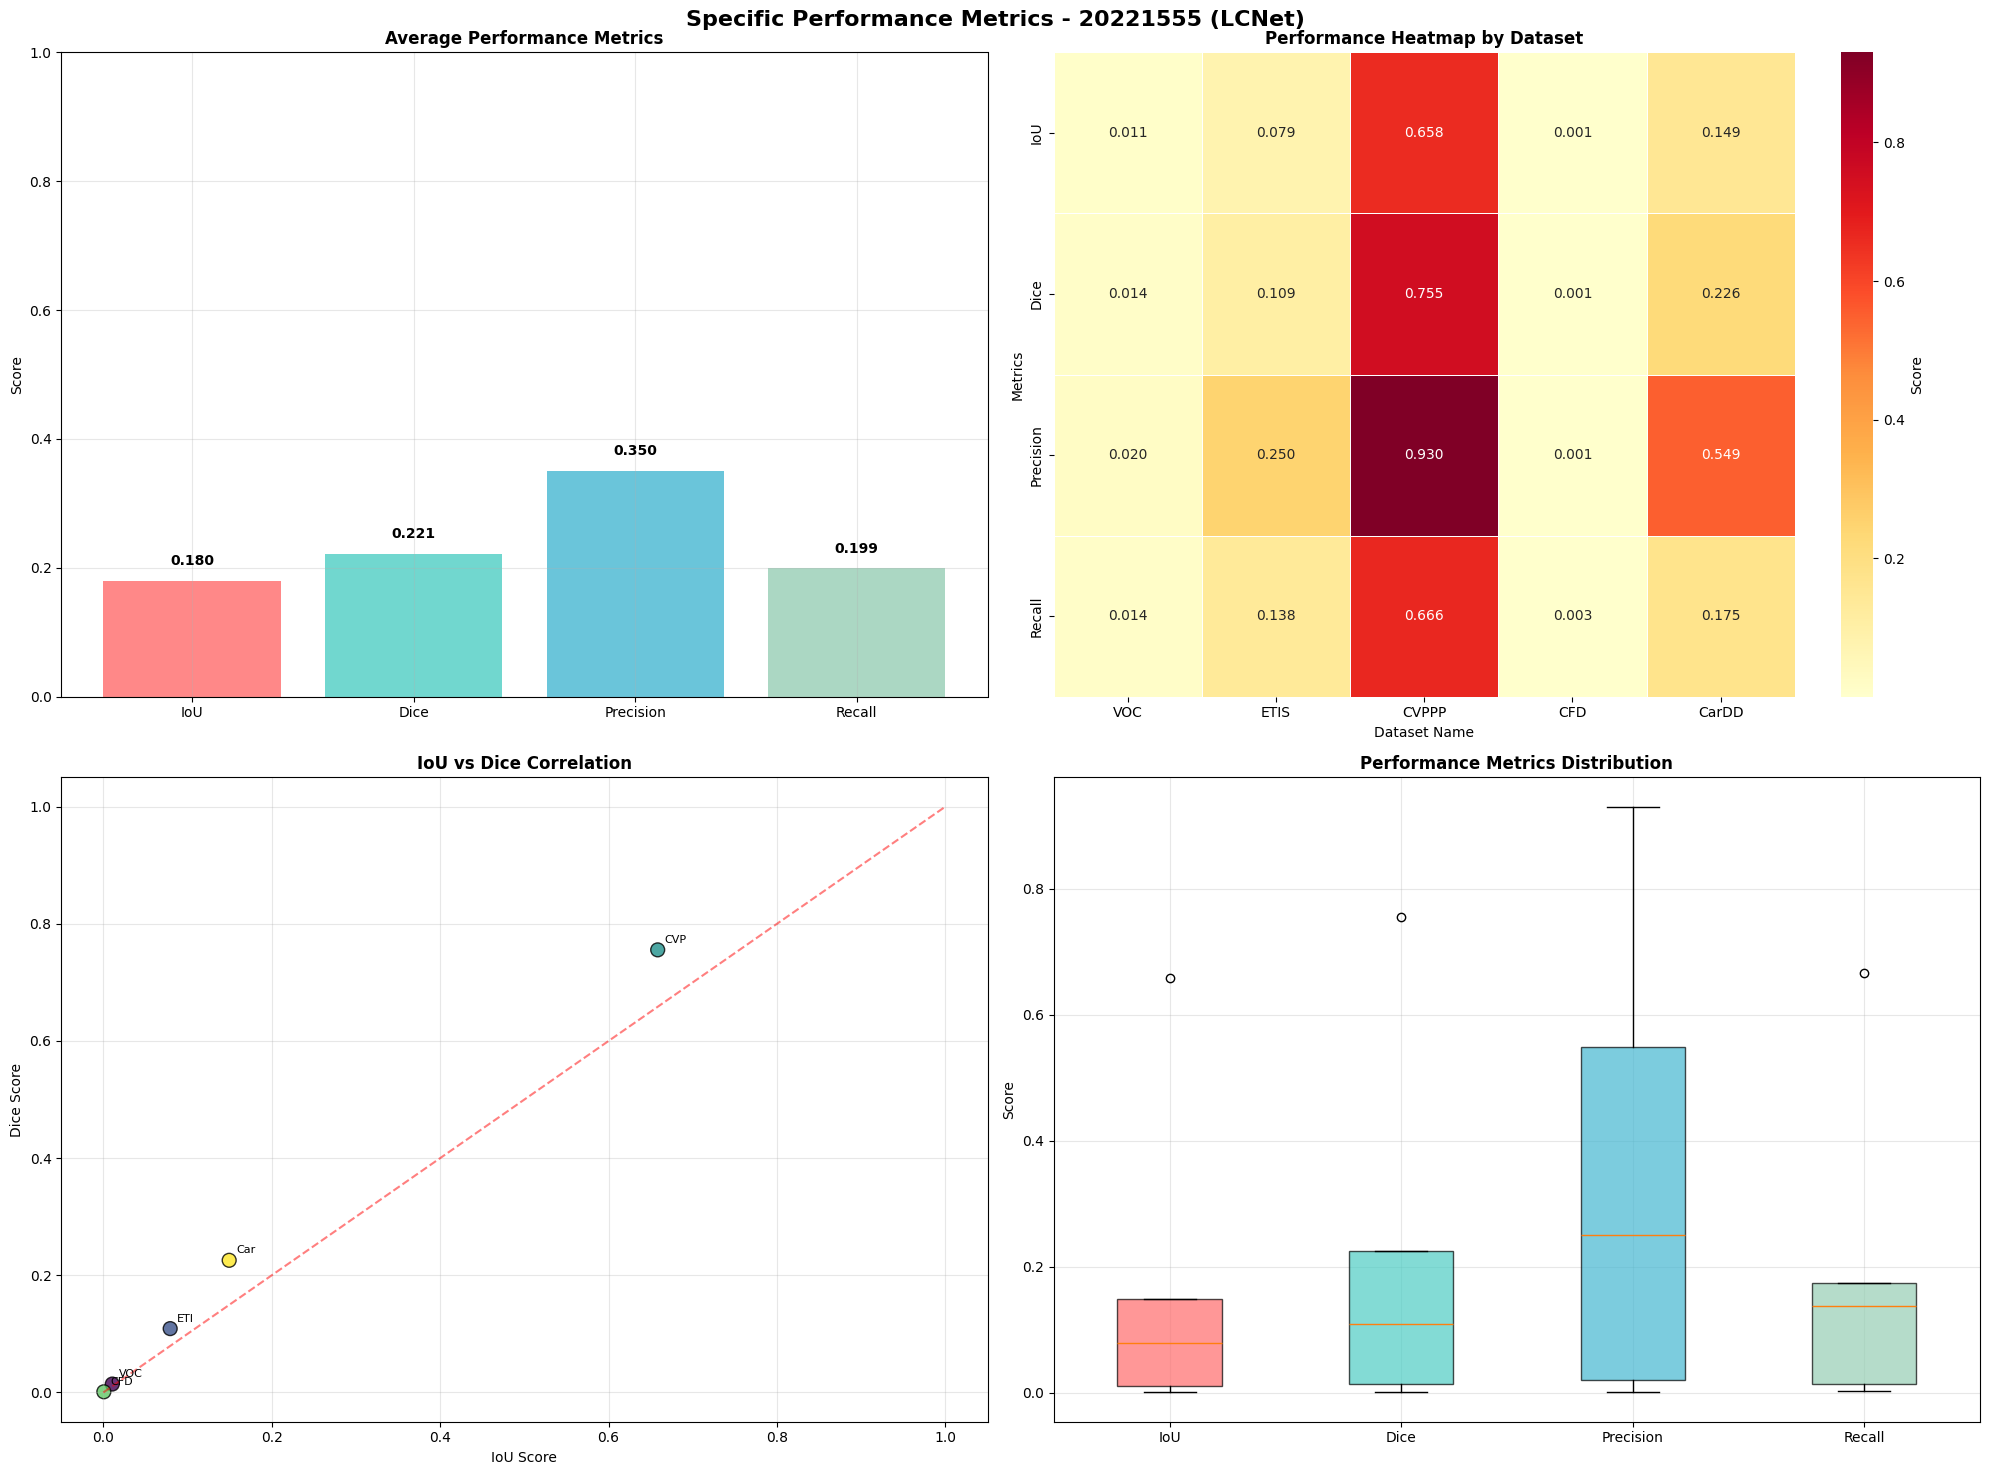

In [9]:
# ==================== 두 번째 장: 상세 분석 ====================
plt.figure(figsize=(20, 15))
plt.suptitle(f'Specific Performance Metrics - {student_id} ({model_name})', fontsize=16, fontweight='bold')

# 2-1. 전체 성능 지표 비교
plt.subplot(2, 2, 1)
metrics = ['IoU', 'Dice', 'Precision', 'Recall']
values = [results_df[metric].mean() for metric in metrics]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = plt.bar(metrics, values, color=colors, alpha=0.8)
plt.title('Average Performance Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

# 각 바 위에 수치 표시
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 2-2. 데이터셋별 성능 히트맵
plt.subplot(2, 2, 2)
heatmap_data = results_df[['IoU', 'Dice', 'Precision', 'Recall']].T
heatmap_data.columns = results_df['Dataset Name']

sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.3f', 
            cbar_kws={'label': 'Score'}, linewidths=0.5)
plt.title('Performance Heatmap by Dataset', fontsize=12, fontweight='bold')
plt.ylabel('Metrics')

# 2-3. IoU vs Dice 상관관계
plt.subplot(2, 2, 3)
plt.scatter(results_df['IoU'], results_df['Dice'], c=range(len(results_df)), 
           cmap='viridis', s=100, alpha=0.8, edgecolors='black')
plt.plot([0, 1], [0, 1], 'r--', alpha=0.5)  # 대각선
plt.xlabel('IoU Score')
plt.ylabel('Dice Score')
plt.title('IoU vs Dice Correlation', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 각 점에 데이터셋 이름 표시
for i, dataset in enumerate(results_df['Dataset Name']):
    plt.annotate(dataset[:3], (results_df['IoU'].iloc[i], results_df['Dice'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# 2-4. 성능 지표별 분포
plt.subplot(2, 2, 4)
metrics_data = []
metrics_labels = []
for metric in ['IoU', 'Dice', 'Precision', 'Recall']:
    metrics_data.append(results_df[metric].tolist())
    metrics_labels.append(metric)

box_plot = plt.boxplot(metrics_data, labels=metrics_labels, patch_artist=True)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Performance Metrics Distribution', fontsize=12, fontweight='bold')
plt.ylabel('Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_root+'/'+f'detail_performance_{Experiments_Time}.png')
plt.show()
